# Demonstrate functions dealing with em follow-up

## new events from gracedb

In [60]:
import importlib
import bot.new_events_utils
importlib.reload(bot.new_events_utils)

<module 'bot.new_events_utils' from '/home/kira/mypy/repos/BBHBot/FlareBot/bot/new_events_utils.py'>

In [61]:
# get events from gracedb that we haven't already saved

from bot.new_events_utils import GetSuperevents
params = GetSuperevents(path_events_dictionary='bot/data', 
                        mlp_modelpath='bot/mlp_model.sav',
                        event_source='gracedb').get_new_events()

111 significant superevents in O4b
https://gracedb.ligo.org/api/superevents/S250108ha/files/none
https://gracedb.ligo.org/api/superevents/S241126dm/files/none
https://gracedb.ligo.org/api/superevents/S241104a/files/none
https://gracedb.ligo.org/api/superevents/S240624cd/files/none
https://gracedb.ligo.org/api/superevents/S240423br/files/none
https://gracedb.ligo.org/api/superevents/S240420aw/files/none
0 events (cut 7 low prob bbh events)


In [12]:
# check the trigger status on fritz and check if we handled the event correctly

eventid = [x[0] for x in params]
dateid = [x[12] for x in params]
a90 = [x[16] for x in params]
far = [x[9] for x in params]
mass = [x[22] for x in params]

from bot.new_events_utils import Fritz
trigger_status = Fritz(eventid, dateid, a90, far, mass).get_trigger_status()

There are currently 102 observation plans generated
0 errors, 0 correct, 0 inspect


In [17]:
# compile event information and save to the dictionary of events

from bot.new_events_utils import NewEventsToDict
df = NewEventsToDict(params, trigger_status, path_events_dictionary='bot/data', check_before_run=False).save_data()
df

New events not saved.


,GW MJD,90% Area (deg2),50% Area (deg2),Distance (Gpc),FAR (years/FA),Mass (M_sol),gcnids,trigger,plan time,plan probability,plan start,cadence
graceids,,,,,,,,,,,,


In [29]:
# default arguments set at contour=90, mindec=-90

skymap_str = [x[18] for x in params]
zmin = [x[19] for x in params]
zmax = [x[20] for x in params]

from bot.new_events_utils import KowalskiCrossmatch
crossmatch = KowalskiCrossmatch(eventid, skymap_str, dateid, zmin, zmax, path_events_dictionary='bot/data')
new_events=crossmatch.check_events_to_crossmatch()
matches = crossmatch.get_crossmatches()

0 events are missing crossmatch: []


22 O4b events with FAR > 10 and mass > 60 and area < 1000 sq deg


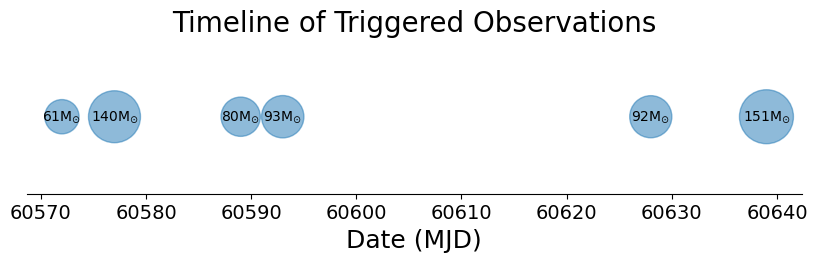

In [37]:
from bot.new_events_utils import PushEventsPublic
df, priority, trigger_df, error_triggers = PushEventsPublic(path_events_dictionary='bot/data',push=False, verbose=True).format_and_push()

In [38]:
trigger_df

,graceids,GW MJD,90% Area (deg2),50% Area (deg2),Distance (Gpc),FAR (years/FA),Mass (M_sol),gcnids,time,probability,start,cadence,comments
0,[S241125n](https://gracedb.ligo.org/superevent...,60639,1956,526,4.47,3.330000e+01,151,[2024-11-25T01:01:17](https://fritz.science/gc...,900.0,0.50,,,Swift/Bat coincident detection
1,[S241114y](https://gracedb.ligo.org/superevent...,60628,152,43,2.51,3.500000e+05,92,[2024-11-14T02:47:12](https://fritz.science/gc...,1140.0,0.86,2024-11-15T01:42:44.719,"[2024.11.22, 2024.11.29, 2024.12.06, 2024.12.1...",
2,[S241009em](https://gracedb.ligo.org/supereven...,60593,25,7,2.78,1.120000e+01,93,[2024-10-09T22:04:56](https://fritz.science/gc...,120.0,0.76,2024-10-12T09:00:53.912,"[2024.10.19, 2024.10.26, 2024.11.02, 2024.11.0...",
3,[S241006k](https://gracedb.ligo.org/superevent...,60589,263,51,1.90,5.300000e+33,80,[2024-10-06T01:53:34](https://fritz.science/gc...,1260.0,0.91,2024-10-06T02:20:20.960,"[2024.10.13, 2024.10.20, 2024.10.27, 2024.11.0...",
4,[S240923ct](https://gracedb.ligo.org/supereven...,60577,216,45,4.02,4.100000e+07,140,[2024-09-23T20:40:06](https://fritz.science/gc...,720.0,0.73,2024-09-24T02:36:34.228,"[2024.10.01, 2024.10.08, 2024.10.15, 2024.10.2...",
5,[S240919bn](https://gracedb.ligo.org/supereven...,60572,16,4,1.71,7.900000e+11,61,[2024-09-19T06:15:59](https://fritz.science/gc...,180.0,0.90,2024-09-19T06:21:30.794,"[2024.09.26, 2024.10.03, 2024.10.10, 2024.10.1...",


# ZTF forced photometry service

In [43]:
# check photometry status

from bot.photometry_utils import PhotometryStatus
PhotometryStatus('O4b', path_events_dictionary='bot/data').show_status()

76 / 98 events in O4b are not priority


,ID,Date last zfps,Status,Trigger
0,S240630t,,needs ZFPS,
1,S250118dp,2025-02-11 18:14:52.995,update ZFPS,
2,S250119ag,2025-02-11 18:19:05.806,update ZFPS,
3,S250109f,2025-01-24 21:21:42.071,update ZFPS,
4,S250108eo,2025-01-24 21:18:05.241,update ZFPS,
5,S241210cw,2025-01-24 23:32:19.070,update ZFPS,
6,S241129aa,2025-01-24 23:35:29.537,update ZFPS,
7,S241130n,2025-01-24 23:38:29.530,update ZFPS,
8,S241114y,2025-01-24 21:04:56.625,update ZFPS,True
9,S241009em,NA,no AGN,True


85 / 3819 dataframes for 3825 Catnorth sources are empty


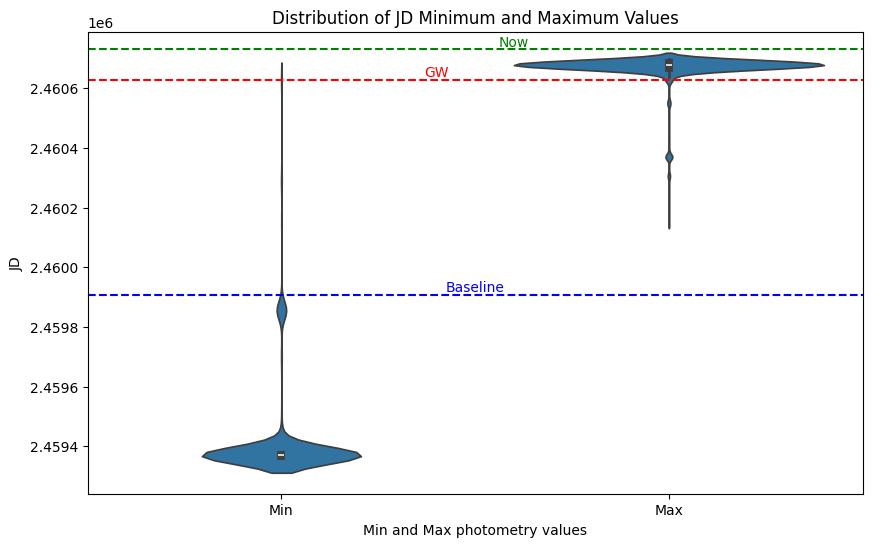

In [49]:
from bot.photometry_utils import PlotPhotometry
PlotPhotometry(graceid='S241114y', path_events_dictionary='bot/data', path_photometry='../../../data/bbh/ZFPS/').plot_photometry_dates()

In [53]:
from bot.photometry_utils import PhotometryCoords
ra, dec, jd = PhotometryCoords(action='update', 
                               graceid='S241114y', 
                               catalog=['catnorth'], 
                               verbose=True,
                               path_events_dictionary='bot/data',
                               path_photometry='../../../data/bbh/ZFPS/').get_photometry_coords()

last photometry request for S241114y was on 2025-01-24 21:04:56.625
Found saved photometry for 3819 / 3825 coords crossmatched
3819 coords are valid for update photometry
After batching dates with window size 60, created 4 batches
Fewer than 1500 AGN - submit in one batch
Fewer than 1500 AGN - submit in one batch
Fewer than 1500 AGN - submit in one batch
More than 1500 AGN - submit in 3 batches
After batching for ZFPS, retrieved 3819 objects in 6 batches


In [134]:
from bot.photometry_utils import GetPhotometry

#GetPhotometry(graceid='S241114y', ra, dec, jd)

In [ ]:
from bot.photometry_utils import SavePhotometry

#SavePhotometry(graceid='S241114y', batch_codes=['11127'], action='update', path_photometry='../../../data/bbh/ZFPS/').save_photometry()

## rolling window heuristic for flares

In [55]:
import importlib
import bot.flares_utils
importlib.reload(bot.flares_utils)

<module 'bot.flares_utils' from '/home/kira/mypy/repos/BBHBot/FlareBot/bot/flares_utils.py'>

In [56]:
from bot.flares_utils import FlarePreprocessing
AGN = FlarePreprocessing(graceid='S241114y', 
                         path_events_dictionary='bot/data', 
                         path_photometry='../../../data/bbh/ZFPS/').process_for_flare()

found 3819 AGN


In [57]:
# default arguments window_size_before=50, window_size_after=25, baseline_years=2

from bot.flares_utils import RollingWindowStats
stats = RollingWindowStats(graceid='S241114y', agn=AGN, path_events_dictionary='bot/data').get_rolling_window_stats()

In [58]:
# k_mad defines the scalar on the mean absolute deviations that a point in the GW window must be brighter than,
# percent defines the percentage of baseline medians that must meet this criteria

from bot.flares_utils import RollingWindowHeuristic
g, r, i, gr, gri = RollingWindowHeuristic(graceid='S241114y', 
                                          agn=AGN, 
                                          rolling_stats=stats, 
                                          path_events_dictionary='bot/data',
                                          percent=0.6, 
                                          k_mad=3, 
                                          save=False).get_flares()

in g,r,i we find 1066,1471,427 candidates
1908 unique flares across all colors
707 AGN have flares in g and r filters
221 AGN have flares in g, r, and i filters
335 / 3819 have no observations in any color in 200 day post GW period
136 / 3819 have no observations in any color before the GW detection


# plot matches from a fully processed graceid

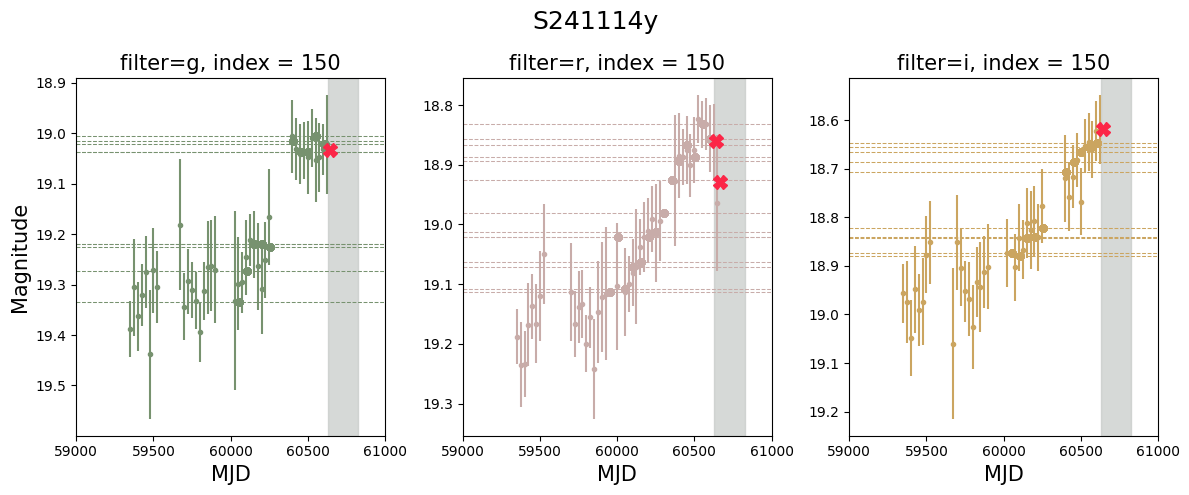

[None]

In [59]:
# plot given the values defined above
from bot.flares_utils import Plotter

# plot from an index:
plot_index = gri[0:1].tolist()
[Plotter(index_to_plot=[i], 
         color_to_plot='all', 
         agn=AGN, 
         rolling_stats=stats, 
         graceid='S241114y', 
         path_events_dictionary='bot/data').show_plots() for i in plot_index]

In [ ]:
# write the photometry retrieval

# will likely need to crossmatch request_date and coords